In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [17]:
IMG_SIZE=50
dataset=r'C:\\Users\\DELL\\images_datasetANN\\train'
categories=['GuideSign','M1','M4','M5','M6','M7',"P1",'P10_50',"P12",'W1']

In [18]:
training_data=[]

for c in categories:
    path=os.path.join(dataset,c)
    class_num=categories.index(c)
    for img in os.listdir(path):
        try:
            img_arrary=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_arrary,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass

In [19]:
import random
random.shuffle(training_data)

In [20]:
X=[]
y=[]
from sklearn.model_selection import train_test_split

In [21]:
for feature ,label in training_data: 
    X.append(feature)
    y.append(label)
print(len(y))
print(len(X))

6024
6024


In [22]:
X=np.array(X)
y=np.array(y)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [24]:
X_train_flatten=X_train.reshape(len(X_train),50*50)
X_test_flatten=X_test.reshape(len(X_test),50*50)

In [25]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='poly',gamma='auto')

In [26]:
model.fit(X_train_flatten,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [27]:
model.score(X_test_flatten,y_test)

0.8946058091286307

In [28]:
y_pred=model.predict(X_test_flatten)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[194   3  17   2   1   2   6   0   0   1]
 [  2  54   5   0   0   0   0   1   0   1]
 [ 20  15 600   9   0   2   3   0   0   3]
 [  0   0   9  32   1   0   1   0   0   0]
 [  1   0   1   1  18   0   0   0   0   0]
 [  2   0   1   0   0  88   0   0   0   4]
 [  3   0   0   0   0   0  40   0   1   0]
 [  0   0   1   0   0   0   1  16   0   0]
 [  0   1   0   1   0   0   0   1  11   0]
 [  3   0   0   0   0   1   0   0   0  25]]


0.8946058091286307

[3 2 0 ... 2 2 2]


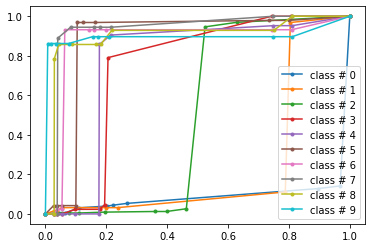

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from collections import Counter

y_pred1 = model.predict(X_test_flatten)

print(y_pred1)
for i in range(10):
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred1, pos_label=i)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras,marker='.'.format(), label='class # %0.f' % i)
    
plt.legend(loc="lower right")

# learning curve

In [31]:
from sklearn.model_selection import learning_curve

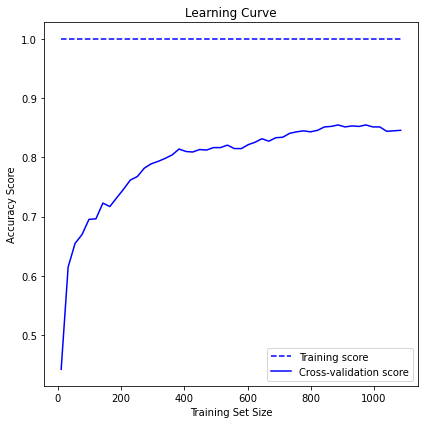

In [32]:
train_sizes, train_scores, test_scores = learning_curve(model,
                                                        X_test_flatten, y_test, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()